# Hw 2
### Joshua Karten


In [1885]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import scipy.integrate as spi

## Intro
We are interested in numerically estimating $K_n = \int_0^1 \frac{x^n}{z +\alpha x}$

 This will be done through upward and downwards recurrence, checking the answer with numerical integration in scipy 

In [1886]:
import math
def Upwards(z, alpha, n):
    "returns array of j_i from i=0 to i=l, including l"
    res = np.zeros(n+1)
    if abs(z)<1e-30: # first take care of the special case, which is numerically hard.
        res[0]=1.
        return res
    k0 =math.log((1+alpha/z))/alpha
    res[0]=k0
    if n==0: return res    
    for i in range(1,n+1):
        kn = 1/(alpha*(i)) - (z/alpha)*k0  
        res[i]=kn        
        k0= kn          
    return res

In [1916]:
def Downwards( z,alpha,n,):
    if abs(alpha/z)>1:   # diverges quickly in this case, prevents overflow
        res = np.zeros(n+1)
        res[0]=1
        return res
    nstart = n-1 # we directly calculate knmax and downward recurr so nstart = nmax-1
    kn=0
    ratio = alpha/z
    for k in range(0,1000000): #can be changed to be lower without significant decrease away from the critical point
        kn+=((-ratio)**k)/(n+k+1)
    kn = kn/z
    res = [kn] # [j_l,j_{l-1},.....j_0]
    for i in range(nstart,-1,-1):
        k0 = 1/(z*(i+1)) - (alpha/z)*kn  
        if i<=n : res.append(k0)
        kn=k0 # sets the calculated value to the next used downward recursion value
    res.reverse()      # reverse the list: [k0,k1,....k_n]
    res = np.array(res) 
    return res

def Downwards2( z,alpha,n,):
    
    if abs(alpha/z)>1:   
        res = np.zeros(n+1)
        res[0]=1
        return res
    nstart = 100000*n-1 #+1+ 100*n # reasonable accuracy gains max out around this amount
    kn=0
    ratio = alpha/z
    kn = kn/z
    res = [] # [j_l,j_{l-1},.....j_0]
    for i in range(nstart,-1,-1):
        k0 = 1/(z*(i+1)) - (alpha/z)*kn  
        if i<=n : res.append(k0)
        kn=k0 # sets the calculated value to the next used downward recursion value
    res.reverse()      # reverse the list: [j0,j1,....j_l]
    res = np.array(res) 
    return res

In [1888]:
def Rec2(alpha,z,n): 
    # taylor expansion as in the bottom on the class notebook
    #agrees with scipy integration to a close enough extent but inferior overall
    res = np.zeros(n+1, dtype=float)
    for i in range(n+1):
        kn=0
        for k in range(1):
            kn=kn+(1/z)*((-alpha/z)**k)/(i+k+1)
        res[i]+=kn
    return res

In [1889]:
def Combined(alpha, z, n): #Makes the choice of upward or downward recursion based on the ratio of alpha and z
    if (alpha/z)<1/2:
        ans = Downwards(z,alpha,n)
    else:
        ans = Upwards(z,alpha, n)
    return ans

## Scipy Integration
To verify our answers, we will integrate Kn using scipy. This will give more accurate answers over all $\alpha$ and z than a taylor series expansion

In [1890]:
def integrand(x,n,z,alpha):
    return x**n/(z+alpha*x) #integrand of kn


def K_n(n,z, alpha):
    result,error = spi.quad(integrand,0,1,args=(n,z,alpha))
    return result

We first show how good our upwards recursion is and how it is unstable for $|\alpha/z|\ll 1$

In [1891]:
z=1
n=10
alpha=1
dint = np.array([K_n(n,z,1) for n in range(11)])
dup = Upwards(z,alpha,n)
print("%4s %16s %16s %16s %16s" % ('n','exact','upward','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.10f %16.10f %16.10f %16.8g" % (i,dint[i],dup[i],abs(dint-dup)[i], (abs(dint-dup)/dint)[i]))

   n            exact           upward        abs-error        rel-error
   0     0.6931471806     0.6931471806     0.0000000000    1.6017133e-16
   1     0.3068528194     0.3068528194     0.0000000000                0
   2     0.1931471806     0.1931471806     0.0000000000                0
   3     0.1401861528     0.1401861528     0.0000000000                0
   4     0.1098138472     0.1098138472     0.0000000000    1.2637557e-16
   5     0.0901861528     0.0901861528     0.0000000000                0
   6     0.0764805139     0.0764805139     0.0000000000    3.6291042e-16
   7     0.0663766290     0.0663766290     0.0000000000                0
   8     0.0586233710     0.0586233710     0.0000000000    3.5509186e-16
   9     0.0524877401     0.0524877401     0.0000000000                0
  10     0.0475122599     0.0475122599     0.0000000000    2.9208856e-16


$\alpha/z\approx 1$ gives low error when calculating Kn with upward recursion 

In [1892]:
z=0.0000001
n=10
alpha=1
dint = np.array([K_n(n,z,1) for n in range(11)])
dup = Upwards(z,alpha,n)
print("%4s %16s %16s %16s %16s" % ('n','exact','upward','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.10f %16.10f %16.10f %16.8g" % (i,dint[i],dup[i],abs(dint-dup)[i], (abs(dint-dup)/dint)[i]))

   n            exact           upward        abs-error        rel-error
   0    16.1180957510    16.1180957510     0.0000000000    1.1020885e-15
   1     0.9999983882     0.9999983882     0.0000000000    1.1945353e-11
   2     0.4999999000     0.4999999000     0.0000000000     1.680878e-13
   3     0.3333332833     0.3333332833     0.0000000000    1.6653348e-16
   4     0.2499999667     0.2499999667     0.0000000000                0
   5     0.1999999750     0.1999999750     0.0000000000     1.387779e-16
   6     0.1666666467     0.1666666467     0.0000000000                0
   7     0.1428571262     0.1428571262     0.0000000000    1.9428905e-16
   8     0.1249999857     0.1249999857     0.0000000000    2.2204463e-16
   9     0.1111110986     0.1111110986     0.0000000000    3.7470031e-16
  10     0.0999999889     0.0999999889     0.0000000000    1.3877789e-16


The same statement holds for $\alpha/z \gg 1$

In [1893]:
z=1000
n=10
alpha=1
dint = np.array([K_n(n,z,1) for n in range(11)])
dup = Upwards(z,alpha,n)
print("%4s %16s %16s %16s %16s" % ('n','exact','upward','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.10f %16.10f %16.10f %16.8g" % (i,dint[i],dup[i],abs(dint-dup)[i], (abs(dint-dup)/dint)[i]))

   n            exact           upward        abs-error        rel-error
   0     0.0009995003     0.0009995003     0.0000000000    1.1021001e-13
   1     0.0004996669     0.0004996669     0.0000000000    2.2001756e-10
   2     0.0003330835     0.0003330834     0.0000000001    3.3005372e-07
   3     0.0002498002     0.0002499101     0.0000001099    0.00044009362
   4     0.0001998335     0.0000898980     0.0001099355       0.55013535
   5     0.0001665239     0.1101019827     0.1099354587        660.17812
   6     0.0001427323  -109.9353159977   109.9354587300        770221.56
   7     0.0001248890 109935.4588548661 109935.4587299771    8.8026542e+08
   8     0.0001110112 -109935458.7298661172 109935458.7299771309     9.903096e+11
   9     0.0000999092 109935458729.9772338867 109935458729.9771270752     1.100354e+15
  10     0.0000908258 -109935458729977.1406250000 109935458729977.1406250000    1.2103986e+18


When $\alpha/z \ll 1$, we clearly see the upward recursion diverging

Now we will examine the same limits for downward recursion

In [1913]:
z=1
n=10
alpha=1
dnd =Downwards(z,alpha,n)
dint = np.array([K_n(n,z,1) for n in range(11)])

print("%4s %16s %16s %16s %16s" % ('n','exact','downward','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dint[i],dnd[i],abs(dint-dnd)[i], (abs(dint-dnd)/dint)[i]))

   n            exact         downward        abs-error        rel-error
   0  0.6931471805599  0.6931466805652  0.0000004999948    7.2133995e-07
   1  0.3068528194401  0.3068533194348  0.0000004999948    1.6294286e-06
   2  0.1931471805599  0.1931466805652  0.0000004999948    2.5886723e-06
   3  0.1401861527734  0.1401866527681  0.0000004999948    3.5666486e-06
   4  0.1098138472266  0.1098133472319  0.0000004999948     4.553112e-06
   5  0.0901861527734  0.0901866527681  0.0000004999948    5.5440302e-06
   6  0.0764805138933  0.0764800138985  0.0000004999948    6.5375443e-06
   7  0.0663766289639  0.0663771289586  0.0000004999948    7.5326927e-06
   8  0.0586233710361  0.0586228710414  0.0000004999948    8.5289321e-06
   9  0.0524877400750  0.0524882400697  0.0000004999948     9.525934e-06
  10  0.0475122599250  0.0475117599303  0.0000004999948    1.0523489e-05


Around $\alpha/z \approx 1$ there is decent, but small, error. This can be fixed by increasing the amount of terms in the power series used to calculate Knmax but that increases the run time more than really needed.

In [1907]:
z=1e4
n=10
alpha=1
dnd =Downwards(z,alpha,n)
dint = np.array([K_n(n,z,1) for n in range(11)])

print("%4s %16s %16s %16s %16s" % ('n','exact','downward','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dint[i],dnd[i],abs(dint-dnd)[i], (abs(dint-dnd)/dint)[i]))

   n            exact         downward        abs-error        rel-error
   0  0.0000999950003  0.0000999950003  0.0000000000000                0
   1  0.0000499966669  0.0000499966669  0.0000000000000                0
   2  0.0000333308335  0.0000333308335  0.0000000000000    2.0330315e-16
   3  0.0000249980002  0.0000249980002  0.0000000000000                0
   4  0.0000199983335  0.0000199983335  0.0000000000000                0
   5  0.0000166652382  0.0000166652382  0.0000000000000                0
   6  0.0000142844644  0.0000142844644  0.0000000000000    1.1859499e-16
   7  0.0000124988890  0.0000124988890  0.0000000000000    1.3553732e-16
   8  0.0000111101112  0.0000111101112  0.0000000000000    1.5247965e-16
   9  0.0000099990910  0.0000099990910  0.0000000000000                0
  10  0.0000090900758  0.0000090900758  0.0000000000000    1.8636433e-16


Downwards recursion is extremely accurate for $\alpha/z \ll 1$.

$\alpha/z \gg 1$ is omitted because the series strongly diverges due to $(\alpha/z)^k$

The next thing is an alternative way to do downwards recurrence which about the same calculation time for similar accuracy. It operates using the knowledge that $\lim_{n\to\infty} K_n = 0$. Thus we set Kn for large n to 0 and iterate backwards. A big advantage of this is the runtime is shorter due to needed less loops to recurr backwards than to directly calculate $K_{10}$

In [1917]:
z=1
n=10
alpha=1
dnd2= Downwards2(z,alpha,n)
dint = np.array([K_n(n,z,1) for n in range(11)])

print("%4s %16s %16s %16s %16s" % ('n','exact','downward2','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dint[i],dnd2[i],abs(dint-dnd2)[i], (abs(dint-dnd2)/dint)[i]))

   n            exact        downward2        abs-error        rel-error
   0  0.6931471805599  0.6931466805602  0.0000004999998    7.2134716e-07
   1  0.3068528194401  0.3068533194398  0.0000004999997    1.6294449e-06
   2  0.1931471805599  0.1931466805602  0.0000004999997    2.5886982e-06
   3  0.1401861527734  0.1401866527731  0.0000004999997    3.5666843e-06
   4  0.1098138472266  0.1098133472269  0.0000004999997    4.5531576e-06
   5  0.0901861527734  0.0901866527731  0.0000004999997    5.5440856e-06
   6  0.0764805138933  0.0764800138935  0.0000004999998    6.5376097e-06
   7  0.0663766289639  0.0663771289636  0.0000004999997    7.5327681e-06
   8  0.0586233710361  0.0586228710364  0.0000004999997    8.5290174e-06
   9  0.0524877400750  0.0524882400747  0.0000004999997    9.5260293e-06
  10  0.0475122599250  0.0475117599253  0.0000004999997    1.0523594e-05


In [1919]:
z=1e4
n=10
alpha=1
dnd2= Downwards2(z,alpha,n)
dint = np.array([K_n(n,z,1) for n in range(11)])

print("%4s %16s %16s %16s %16s" % ('n','exact','downward2','abs-error','rel-error'))
for i in range(len(dup)):
    print("%4d %16.13f %16.13f %16.13f %16.8g" % (i,dint[i],dnd2[i],abs(dint-dnd2)[i], (abs(dint-dnd2)/dint)[i]))

   n            exact        downward2        abs-error        rel-error
   0  0.0000999950003  0.0000999950003  0.0000000000000                0
   1  0.0000499966669  0.0000499966669  0.0000000000000                0
   2  0.0000333308335  0.0000333308335  0.0000000000000    2.0330315e-16
   3  0.0000249980002  0.0000249980002  0.0000000000000                0
   4  0.0000199983335  0.0000199983335  0.0000000000000                0
   5  0.0000166652382  0.0000166652382  0.0000000000000                0
   6  0.0000142844644  0.0000142844644  0.0000000000000    1.1859499e-16
   7  0.0000124988890  0.0000124988890  0.0000000000000    1.3553732e-16
   8  0.0000111101112  0.0000111101112  0.0000000000000    1.5247965e-16
   9  0.0000099990910  0.0000099990910  0.0000000000000                0
  10  0.0000090900758  0.0000090900758  0.0000000000000                0


We now look at a combined upwards and downward reccurrence, comparing it to scipy integration. First we will look at a slice along a constant z.

In [1924]:
alp= [0.1,0.4,0.49,0.51,0.6,0.9,1,10,100]
z=0.1
n=10
#date = np.array([Rec2(t,z,n) for t in alp])
datc = np.array([Combined(t,z,n) for t in alp])
dats = np.zeros((np.size(alp),n+1))
for i in range(np.size(alp)):
    dats[i,:]= np.array([K_n(n,z,alp[i]) for n in range(11)])

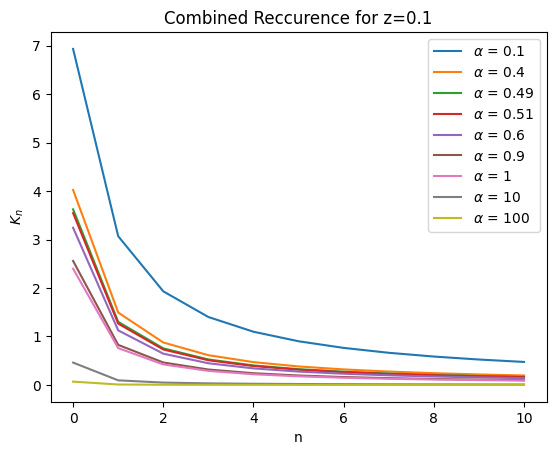

Text(0, 0.5, '$K_n$')

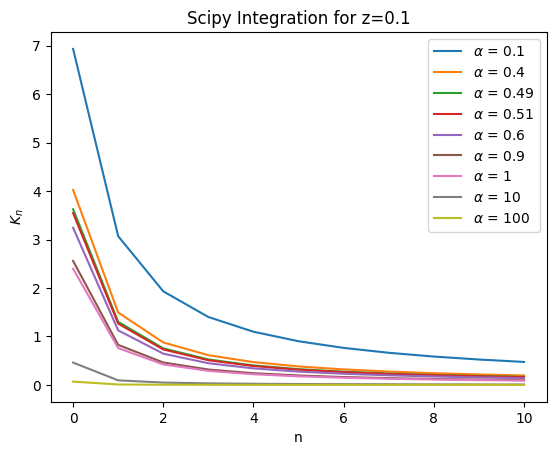

In [1926]:
fig,ax=plt.subplots()
for i in range(np.size(alp)):
    ax.plot(np.linspace(0,10,11),datc[i, :], label=r"$\alpha$ = " + str(alp[i]))
ax.legend()
ax.set_title('Combined Reccurence for z='+str(z))
ax.set_xlabel('n')
ax.set_ylabel(r'$K_n$')
plt.show()

fig,ax=plt.subplots()
for i in range(np.size(alp)):
    ax.plot(np.linspace(0,10,11),dats[i, :], label=r"$\alpha$ = " + str(alp[i]))
ax.legend()
ax.set_title('Scipy Integration for z='+str(z))
ax.set_xlabel('n')
ax.set_ylabel(r'$K_n$')

There is little to no difference between the scipy result and our approximation. To look at this further, we will sample across z and $\alpha$ and compare the difference directly over different n.

In [ ]:
alps = np.geomspace(0.01,100,20)
cdat2 = np.zeros((len(alps),len(alps),11))
sdat2 = np.zeros((len(alps),len(alps),11))

for i in range(len(alps)):
    for j in range(len(alps)):
        cdat2[i,j,:]=np.array(Combined(alps[i],alps[j],10))
        sdat2[i,j,:] = np.array([K_n(n,alps[j],alps[i]) for n in range(11)])
        


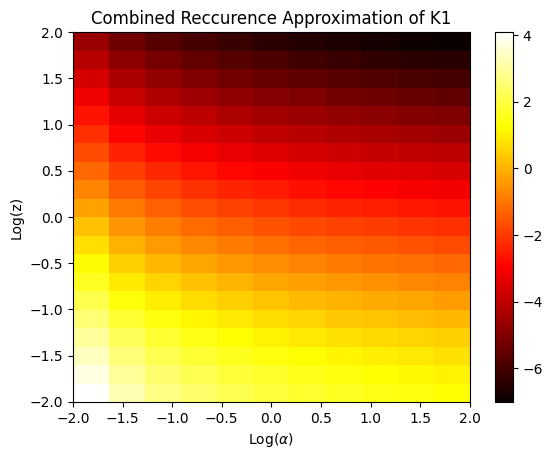

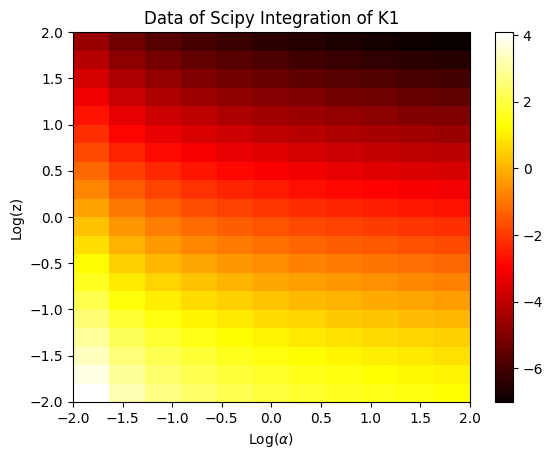

In [1943]:
i=1
fig,ax=plt.subplots()
rec1=plt.imshow(cdat2[i],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(cdat2[i]), vmax=np.max(cdat2[i]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Combined Reccurence Approximation of K'+str(1))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
fig,ax=plt.subplots()
rec1=plt.imshow(sdat2[1],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(sdat2[i]), vmax=np.max(sdat2[i]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Data of Scipy Integration of K'+str(1))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
plt.show()

Still no observable difference. We will use a log scale for the data to see more clearly.

In [1931]:
sdat2=np.log(sdat2)
cdat2=np.log(cdat2)
diff2 = np.abs(sdat2-cdat2)

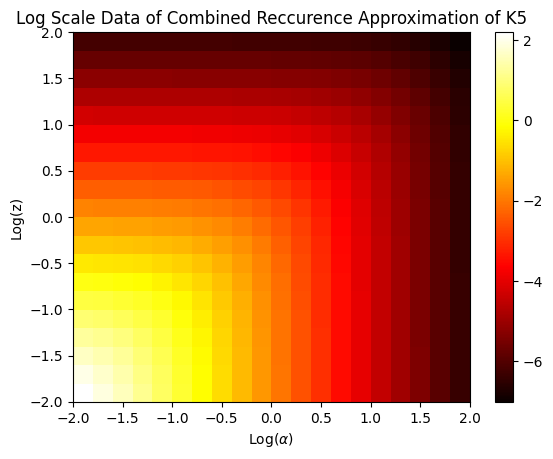

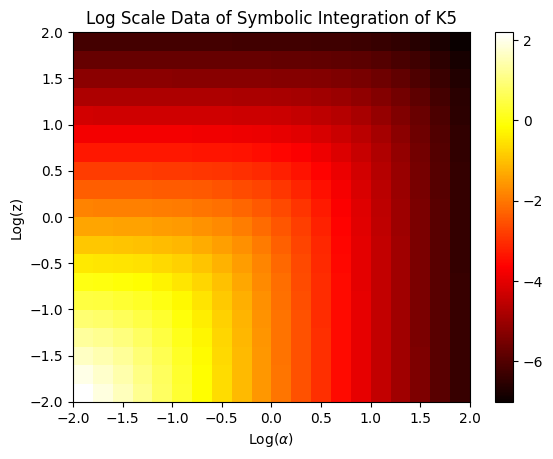

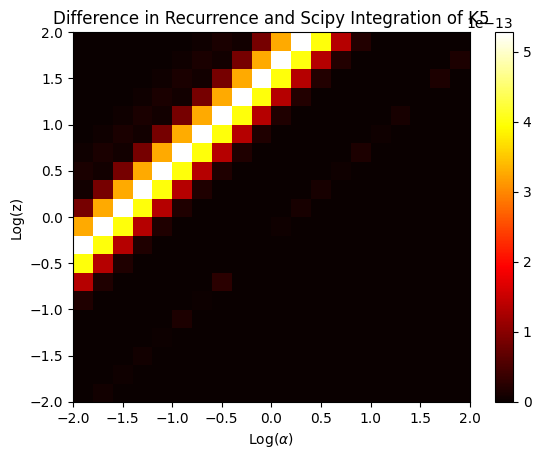

In [1941]:
it = 5
fig,ax=plt.subplots()
rec1=plt.imshow(cdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(cdat2[:,:,it]), vmax=np.max(cdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Combined Reccurence Approximation of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
fig,ax=plt.subplots()
rec1=plt.imshow(sdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(sdat2[:,:,it]), vmax=np.max(sdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Symbolic Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
plt.show()
fig,ax=plt.subplots()
rec1=plt.imshow(diff2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(diff2[:,:,it]), vmax=np.max(diff2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Difference in Recurrence and Scipy Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
plt.show()

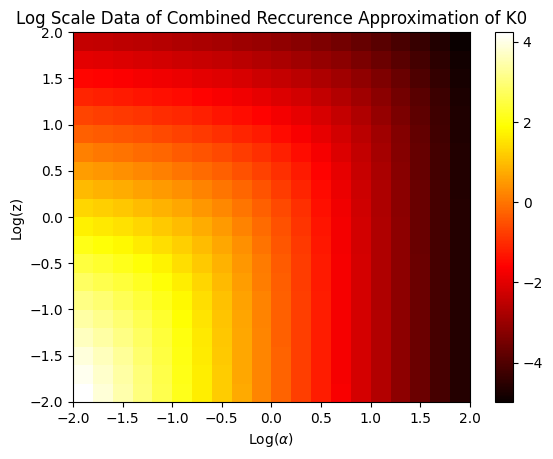

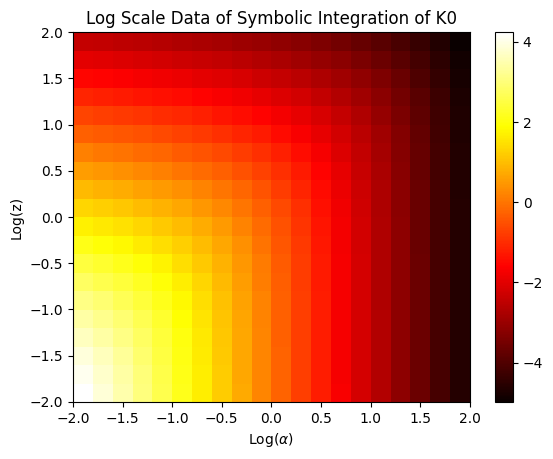

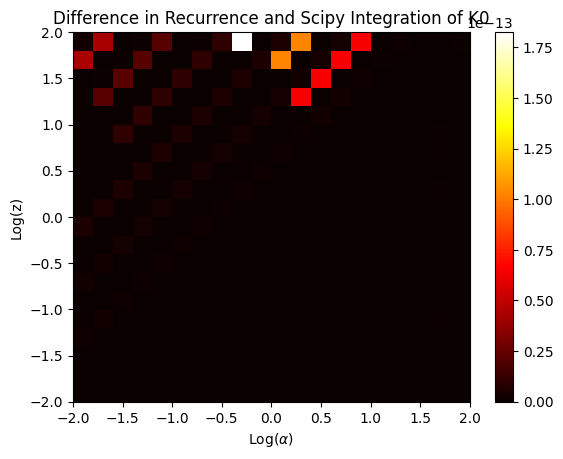

In [1940]:
it = 0
fig,ax=plt.subplots()
rec1=plt.imshow(cdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(cdat2[:,:,it]), vmax=np.max(cdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Combined Reccurence Approximation of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
fig,ax=plt.subplots()
rec1=plt.imshow(sdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(sdat2[:,:,it]), vmax=np.max(sdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Symbolic Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
plt.show()
fig,ax=plt.subplots()
rec1=plt.imshow(diff2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(diff2[:,:,it]), vmax=np.max(diff2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Difference in Recurrence and Scipy Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
plt.show()

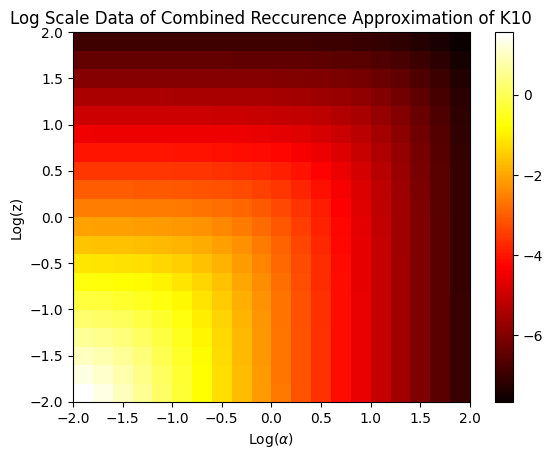

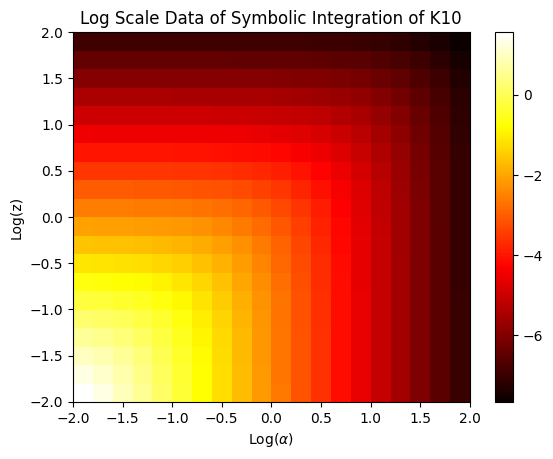

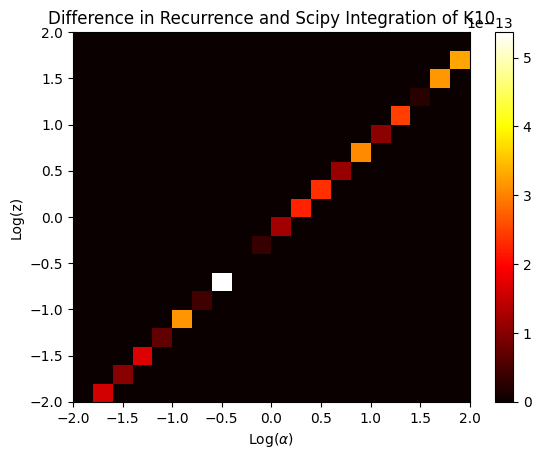

In [1944]:
it = 10
fig,ax=plt.subplots()
rec1=plt.imshow(cdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(cdat2[:,:,it]), vmax=np.max(cdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Combined Reccurence Approximation of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
fig,ax=plt.subplots()
rec1=plt.imshow(sdat2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(sdat2[:,:,it]), vmax=np.max(sdat2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Log Scale Data of Symbolic Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
plt.show()
fig,ax=plt.subplots()
rec1=plt.imshow(diff2[:,:,it],cmap='hot', interpolation='nearest', origin='lower', extent=[-2,2,-2,2],vmin=np.min(diff2[:,:,it]), vmax=np.max(diff2[:,:,it]), aspect='auto')
fig.colorbar(rec1, ax=ax, location ='right', shrink = 1)
ax.set_title('Difference in Recurrence and Scipy Integration of K'+str(it))
ax.set_ylabel('Log(z)')
ax.set_xlabel(r'Log($\alpha$)')
plt.show()

The difference can be shown directly for each n, z, and $\alpha$ permutation, but the point has been made through n=0,5,10 that the combined algorithm works well near and far from the $\alpha/z \approx 1/2$